In [5]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [6]:
my_data=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])

In [7]:
lamb = 3
n = 20
x_bar = np.mean(my_data)
sum_x_i = sum(my_data)


AAM = -2*log( ((lamb**n) * np.exp(-lamb*sum_x_i))/ (((1/x_bar)**n) * np.exp(-(1/x_bar)*sum_x_i)) )
AAM



4.719222360188457

In [8]:
((lamb**n) * np.exp(-lamb*sum_x_i))/ (((1/x_bar)**n) * np.exp(-(1/x_bar)*sum_x_i))

0.09445694279678164

In [9]:
1-stats.chi2.cdf(AAM,1)

0.029827229194775207

#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis. 

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [10]:
###Use ppf tho....quicker
1-stats.chi2.cdf(3.8414,1)

0.050001754033908385

In [11]:
stats.chi2.ppf(0.95,1)

3.841458820694124

Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [12]:
ts_stat = []
for _ in np.arange(10000):
    rs = stats.expon.rvs(scale=1/5,size =20)
    lamb = 3
    n = 20
    x_bar = np.mean(rs)
    sum_x_i = sum(rs)
    AAM = -2*log( ((lamb**n) * np.exp(-lamb*sum_x_i))/ (((1/x_bar)**n) * np.exp(-(1/x_bar)*sum_x_i)) )
    ts_stat = np.append(ts_stat, AAM)
ts_stat 

array([5.0078668 , 5.96370395, 3.14576814, ..., 7.83216131, 5.43196849,
       0.71203492])

In [13]:
sum(ts_stat>=3.8414)/10000

0.5939

I would reject the the null hypothesis about 60% of the time becasue correctly... if the test stat is greater than critical val we reject.  

Repeat for a sample size of 50. What do you expect to happen to power? 

I would expect the power to increase because the sample size increases.  

In [14]:
ts_stat = []
for _ in np.arange(10000):
    rs = stats.expon.rvs(scale=1/5,size =50)
    lamb = 3
    n = 50
    x_bar = np.mean(rs)
    sum_x_i = sum(rs)
    AAM = -2*log( ((lamb**n) * np.exp(-lamb*sum_x_i))/ (((1/x_bar)**n) * np.exp(-(1/x_bar)*sum_x_i)) )
    ts_stat = np.append(ts_stat, AAM)
    
sum(ts_stat>3.81)/10000 

0.9523

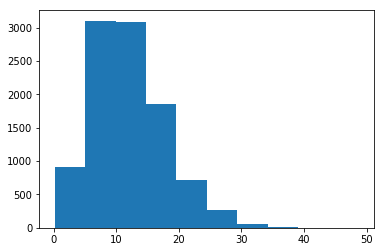

In [15]:
plt.hist(ts_stat)
plt.show()

I would expect the power the increase with an increase in sample size, which it does.

### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

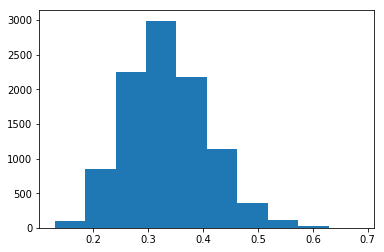

0.0368

In [16]:
#Used sample mean. 
temp = make_array()
for _ in np.arange(10000):
    rs = np.mean(stats.expon.rvs(scale=1/3,size =20))
    temp = np.append(temp,rs)
temp   

plt.hist(temp)
plt.show()

2*np.mean(temp<=np.mean(my_data))

How did the $p$-value compare to the LRT $p$-value? I got a larger p-value.... 0.0388 versus 0.0298

I wonder how the power of this test compares to our LRT. 

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [17]:
lower = percentile(2.5,temp)
lower

0.20352017961098384

In [18]:
upper = percentile(97.5,temp)
upper

0.4924246768705622

Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [19]:
temp5 = make_array()
for i in np.arange(10000):
    test5=np.mean(stats.expon.rvs(scale=1/5,size=n))
    temp5 = np.append(temp5,test5)
       
np.mean(temp5>=upper) + np.mean(temp5<=lower)

0.5598

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

In [20]:
temp6 = make_array()
for i in np.arange(10000):
    test6=np.mean(stats.expon.rvs(scale=1/3,size=50))
    temp6 = np.append(temp6,test6)

lower_new = percentile(2.5, temp6)
upper_new = percentile(97.5, temp6)


temp7 = make_array()
for i in np.arange(10000):
    test7=np.mean(stats.expon.rvs(scale=1/5,size=50))
    temp7 = np.append(temp7,test7)
    
np.mean(temp7>=upper_new) + np.mean(temp7<=lower_new)

0.9384